In [1]:
# Cell 1 — Imports

import os, sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from scripts.finance_tools import load_price, add_talib_indicators
import pynance as pn

In [2]:
# Cell 2 — Load stock data

df_price = load_price("AAPL", start="2022-01-01", end="2025-01-01")
df_price.head()

d:\KAIM8_W0\week1-news-sentiment\scripts\finance_tools.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, interval=interval, progress=False)


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,178.270355,179.122490,174.058716,174.176246,104487900
2022-01-04,176.007767,179.181201,175.439682,178.877573,99310400
2022-01-05,171.325989,176.468119,171.051743,175.919628,94537600
2022-01-06,168.465988,171.698187,168.113384,169.151603,96904000
2022-01-07,168.632492,170.562016,167.515916,169.337700,86709100


In [3]:
# Cell 3 — Apply TA-Lib indicators

df_ind = add_talib_indicators(df_price)
df_ind.tail()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,
2024-12-24,257.037506,257.047440,254.140589,254.339701,23234700,245.184590,234.761246,75.750290,6.046650,5.371808,0.674842
2024-12-26,257.853760,258.928914,256.470034,257.027510,27237100,246.377194,235.267495,76.452865,6.278548,5.553156,0.725392
2024-12-27,254.439224,257.535238,251.920617,256.669129,42355300,247.405544,235.746623,67.626282,6.116300,5.665785,0.450515
2024-12-30,251.064484,252.358634,249.621015,251.094347,35557500,248.145695,236.150897,60.225575,5.650271,5.662682,-0.012411
2024-12-31,249.292511,252.139635,248.306963,251.303420,39480700,248.684757,236.463051,56.715924,5.079404,5.546027,-0.466622


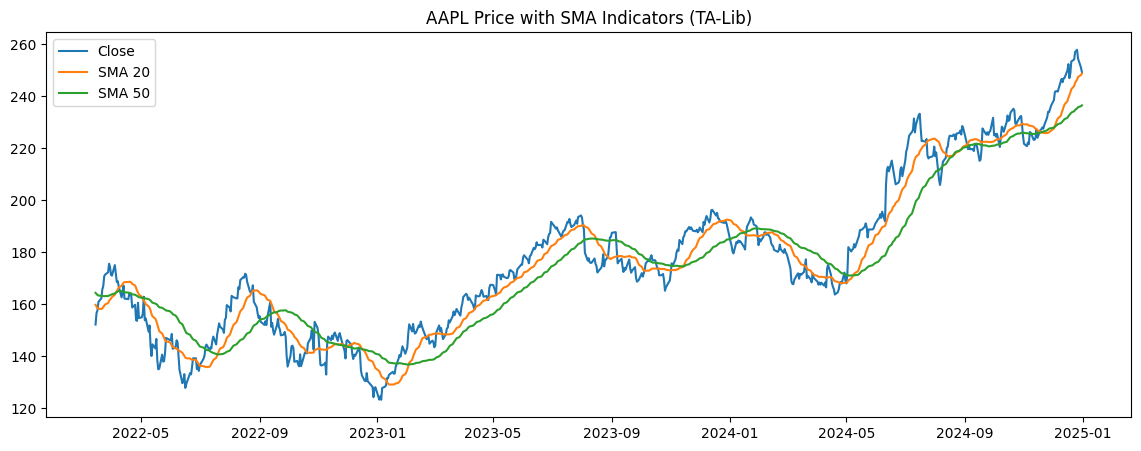

In [4]:
# Cell 4 — Plot SMA

plt.figure(figsize=(14,5))
plt.plot(df_ind.index, df_ind["Close"], label="Close")
plt.plot(df_ind.index, df_ind["SMA_20"], label="SMA 20")
plt.plot(df_ind.index, df_ind["SMA_50"], label="SMA 50")
plt.title("AAPL Price with SMA Indicators (TA-Lib)")
plt.legend()
plt.show()


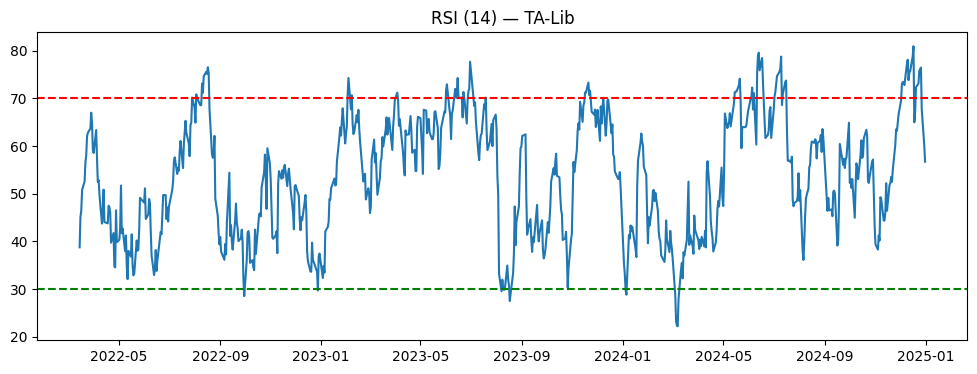

In [5]:
# Cell 5 — Plot RSI

plt.figure(figsize=(12,4))
plt.plot(df_ind.index, df_ind["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14) — TA-Lib")
plt.show()

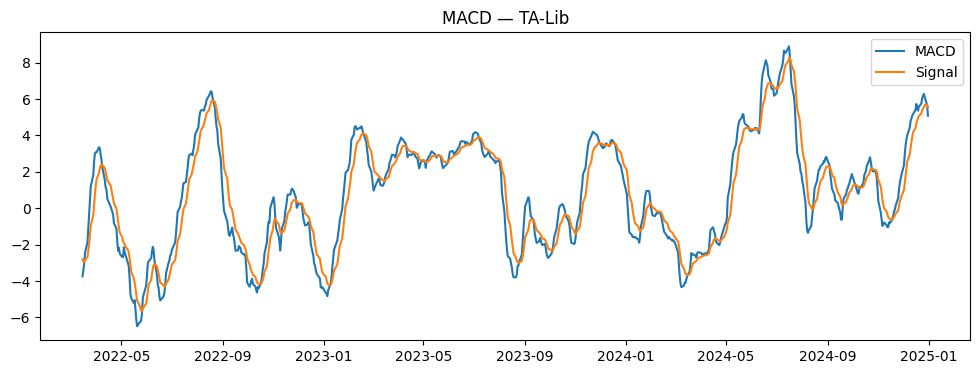

In [6]:
# Cell 6 — Plot MACD

plt.figure(figsize=(12,4))
plt.plot(df_ind.index, df_ind["MACD"], label="MACD")
plt.plot(df_ind.index, df_ind["MACD_signal"], label="Signal")
plt.title("MACD — TA-Lib")
plt.legend()
plt.show()


In [7]:
# Cell 7 — Use standard Pandas/NumPy for returns & volatility

import numpy as np # Ensure NumPy is imported for calculations

# daily returns: calculate the percentage change between rows
returns = df_price["Close"].pct_change().dropna()

# volatility (Annualized: daily stdev * sqrt(252 trading days))
volatility = returns.std() * np.sqrt(252) # Assuming 252 trading days in a year

print("Daily returns (first 5):")
print(returns.head())
print("\nAnnualized Volatility:", volatility)

Daily returns (first 5):
Date
2022-01-04   -0.012692
2022-01-05   -0.026600
2022-01-06   -0.016693
2022-01-07    0.000988
2022-01-10    0.000116
Name: Close, dtype: float64

Annualized Volatility: 0.2709351947202353


In [8]:
# Cell 8 — Calculate Sharpe Ratio (Annualized)

# Define a daily risk-free rate (e.g., 1% annual rate / 252 trading days)
risk_free_rate_daily = (0.01 / 252)

# Calculate the Sharpe Ratio (Annualized)
# Formula: (Average Daily Return - Risk Free Rate) / Daily Std Dev * sqrt(252)
sharpe = (returns.mean() - risk_free_rate_daily) / returns.std() * np.sqrt(252)

print("Sharpe Ratio (Annualized):", sharpe)

Sharpe Ratio (Annualized): 0.5129075905058977
